##### I want to try mplfinance lib to plot a candlestick chart

In [48]:
import datetime as dt
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
%matplotlib inline

In [38]:
start_date = dt.datetime(2020,1,1)
end_date = dt.datetime.now()

In [39]:
print(start_date)

2020-01-01 00:00:00


In [40]:
data = yf.download("SPY", start=start_date.strftime("%Y-%m-%d"), end=end_date.strftime("%Y-%m-%d"))

[*********************100%***********************]  1 of 1 completed


In [41]:
data = data[['Open', 'High', 'Low', 'Close']]

In [42]:
print(data.head())

                  Open        High         Low       Close
Date                                                      
2020-01-02  323.540009  324.890015  322.529999  324.869995
2020-01-03  321.160004  323.640015  321.100006  322.410004
2020-01-06  320.489990  323.730011  320.359985  323.640015
2020-01-07  323.019989  323.540009  322.239990  322.730011
2020-01-08  322.940002  325.779999  322.670013  324.450012


##### I know that I need the date as a column not index. So I'll reset the index

In [43]:
data.reset_index(inplace=True)

In [44]:
print(data.head())

        Date        Open        High         Low       Close
0 2020-01-02  323.540009  324.890015  322.529999  324.869995
1 2020-01-03  321.160004  323.640015  321.100006  322.410004
2 2020-01-06  320.489990  323.730011  320.359985  323.640015
3 2020-01-07  323.019989  323.540009  322.239990  322.730011
4 2020-01-08  322.940002  325.779999  322.670013  324.450012


##### Now I need to change the date to a number so it can be ploted

In [45]:
data['Date'] = data['Date'].map(mdates.date2num)

/home/mauro/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
print(data.head())

      Date        Open        High         Low       Close
0  18263.0  323.540009  324.890015  322.529999  324.869995
1  18264.0  321.160004  323.640015  321.100006  322.410004
2  18267.0  320.489990  323.730011  320.359985  323.640015
3  18268.0  323.019989  323.540009  322.239990  322.730011
4  18269.0  322.940002  325.779999  322.670013  324.450012


##### Now it's time to plot the values. I saw that a black background looks better, with white text and grid

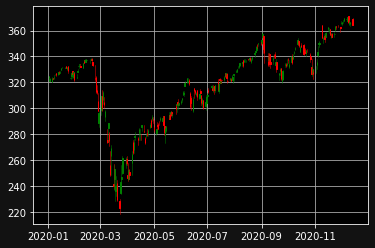

In [59]:
ax = plt.subplot()
ax.grid(True)
ax.set_axisbelow(True)
ax.xaxis_date()
ax.set_facecolor('black')
ax.figure.set_facecolor('#121212')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
candlestick_ohlc(ax, data.values, width=0.5, colorup='g')
plt.show()